DZ_10_Дисперсионный анализ

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as math
import matplotlib.pyplot as plt
import seaborn as sns

###1. Задача: провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:
Футболисты: [173, 175, 180, 178, 177, 185, 183, 182]. \
Хоккеисты: [177, 179, 180, 188, 177, 172, 171, 184, 180]. \
Штангисты: [172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170].

Запись гипотез: \
**H0** = µ(ftbl_heights) =  µ(hck_heights) = µ(pwr_heights) \
**H1** = µ(ftbl_heights) !=  µ(hck_heights) & | != µ(pwr_heights)

In [ ]:
ftbl_heights = np.array([173, 175, 180, 178, 177, 185, 183, 182]) # футболисты
n_ftbl = len(ftbl_heights)
ftbl_mean = ftbl_heights.mean()
hck_heights = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180]) # хоккеисты
n_hck = len(hck_heights)
hck_mean = hck_heights.mean()
pwr_heights = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]) # штангисты
n_pwr = len(pwr_heights)
pwr_mean = pwr_heights.mean()

In [ ]:
# проведем тест
α = 0.05
stats.kruskal(ftbl_heights, hck_heights, pwr_heights) #используем критерий Крускала-Уоллиса – критерий, используемый для сравнения 3-ех и более независимых выборок по количественному или порядковому признаку \
# когда нарушается предположение о нормальности и нужно узнать о наличии статистически значимой разницы между медианами групп.

KruskalResult(statistic=7.897493213863828, pvalue=0.01927885061595347)

При α = 0.05, pvalue 0.0193 < α, отвергаем H0 - и переходим к H1 -  группы с ростом спортсменов  статистически различны

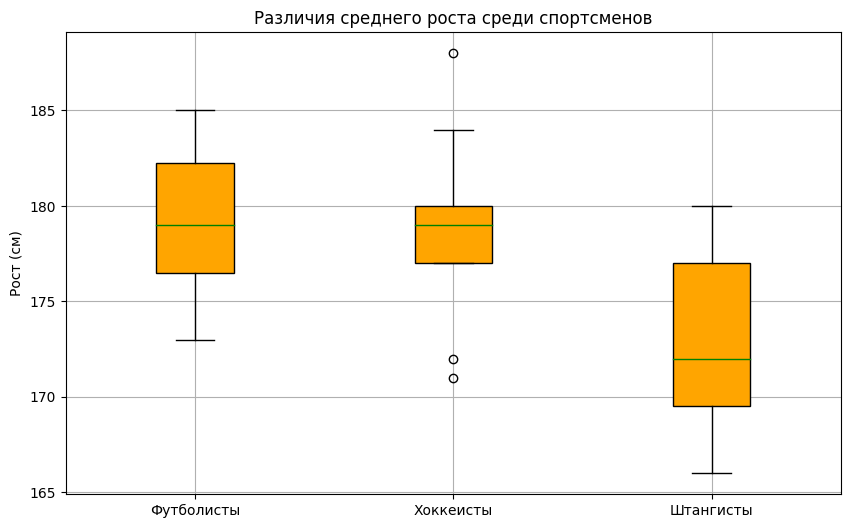

In [ ]:
#посмотрим, как это выглядит на графике, исползуем boxplot
plt.figure(figsize=(10, 6))
sns.set_palette(['orange', 'green'])
plt.boxplot([ftbl_heights, hck_heights, pwr_heights], labels = ['Футболисты', 'Хоккеисты', 'Штангисты'], patch_artist = True)
plt.title('Различия среднего роста среди спортсменов')
plt.ylabel('Рост (см)')
plt.grid(True)
plt.show()

визуально видим разницу между ростами групп, \
проведем еще один тест - используем встроенный тест-анализ однофакторной дисперсии:

In [ ]:
stats.f_oneway(ftbl_heights, hck_heights, pwr_heights)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

**При α = 0.05, pvalue 0.0105 > α, отвергаем H0 - и переходим к H1 - видим по второму тесту еще раз, что группы с ростом спортсменов статистически различны**

###2. Дисперсионный анализ не показывает,  между какими именно средними были найдены различия. Выясним, между какими именно группами найдены статистически значимые различия, воспользуемся post hoc тестом Тьюки.

2.1. Так как размеры выборки не равны, попробуем брать несколько "неполных измерений"

In [101]:
#создадим таблицу ростов, данные в группах приведем к виду серий, добавим тип данных
ftbl_height = pd.Series([173, 175, 180, 178, 177, 185, 183, 182], name = 'Футболисты', dtype = pd.Int64Dtype())
hck_height = pd.Series([177, 179, 180, 188, 177, 172, 171, 184, 180], name = 'Хоккеисты', dtype = pd.Int64Dtype())
pwr_height = pd.Series([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170], name = 'Штангисты', dtype = pd.Int64Dtype())
df = pd.concat([ftbl_height, hck_height, pwr_height], keys = ['Футболисты', 'Хоккеисты', 'Штангисты'], ignore_index = False, axis = 1)
df.index = np.arange(1, len(df) + 1) # нумерация c  '1', а не с '0' индекса
df

,Футболисты,Хоккеисты,Штангисты
1,173,177,172
2,175,179,173
3,180,180,169
4,178,188,177
5,177,177,166
6,185,172,180
7,183,171,178
8,182,184,177
9,<NA>,180,172
10,<NA>,<NA>,166


Назовем "неполными измерениями": 9, 10, 11. Далее удалим их и проведем post hoc test Тьюки

In [ ]:
# удалим данные "неполных измерений": 9, 10, 11
data = [df[col].dropna() for col in df]

In [113]:
# perform Tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#create DataFrame to hold data
#df = pd.DataFrame({'рост': [173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177, 172, 171, 184, 172, 173, 169, 177, 166, 180, 178, 177],
#df = pd.DataFrame({'рост': [173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177, 172, 171, 184, 172, 173, 169, 177, 166, 180, 178, 177],
df = pd.DataFrame({'рост': [173, 175, 180, 178, 177, 185, 183, 182, 177, 179, 180, 188, 177, 172, 171, 184, 172, 173, 169, 177, 166, 180, 178, 177],
                   'группа': np.repeat(['Футболисты', 'Хоккеисты', 'Штангисты'], repeats = 8)})

tukey = pairwise_tukeyhsd(endog = df['рост'],
                          groups = df['группа'],
                          alpha = 0.05)

#display results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Футболисты Хоккеисты   -0.625 0.9651  -6.8289 5.5789  False
Футболисты Штангисты   -5.125 0.1178 -11.3289 1.0789  False
 Хоккеисты Штангисты     -4.5 0.1849 -10.7039 1.7039  False
-----------------------------------------------------------


Мы видим что при таком подходе статистические различия при alpha=0.05 не найдены между ростами групп:
 - Футболисты и Хоккеисты (так как p-value = 0.9651 > α)
 - Футболисты и Штангисты (так как p-value = 0.1178 > α)
 - Хоккеисты  и Штангисты (так как p-value = 0.1849 > α)
** но это противоречит первичным выводам в пункте 1**

2.2. **Поэтому попробуем добавить измерения 9, 10, 11 к группе 'Футболисты' \
и 10, 11 к группе 'Хоккеисты' на основе средних значений по каждой из этих групп** \
(df_model['Футболисты'].mean() = 179,  df_model['Хоккеисты'].mean() = 178)

In [114]:
ftbl_height = pd.Series([173, 175, 180, 178, 177, 185, 183, 182], name='Футболисты', dtype='float64')
hck_height = pd.Series([177, 179, 180, 188, 177, 172, 171, 184, 180], name='Хоккеисты', dtype='float64')
pwr_height = pd.Series([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170], name='Штангисты', dtype='float64')

df_model = pd.concat([ftbl_height, hck_height, pwr_height], axis=1)

df_model['Футболисты'].fillna(df_model['Футболисты'].mean(), inplace=True)
df_model['Хоккеисты'].fillna(df_model['Хоккеисты'].mean(), inplace=True)

df_model['Футболисты'] = df_model['Футболисты'].astype('int64')
df_model['Хоккеисты'] = df_model['Хоккеисты'].astype('int64')
df_model['Штангисты'] = df_model['Штангисты'].astype('int64')

df_model.index = range(1, len(df_model) + 1)
df_model

,Футболисты,Хоккеисты,Штангисты
1,173,177,172
2,175,179,173
3,180,180,169
4,178,188,177
5,177,177,166
6,185,172,180
7,183,171,178
8,182,184,177
9,179,180,172
10,179,178,166


**снова проведем post hoc test Тьюки (N2)**

In [115]:
# perform Tukey's test N2
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#create DataFrame to hold data
df_model = pd.DataFrame({'рост': [173, 175, 180, 178, 177, 185, 183, 182, 179, 179, 179, 177, 179, 180, 188, 177, 172, 171, 184, 180, 178, 178, 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170],
                   'группа': np.repeat(['Футболисты', 'Хоккеисты', 'Штангисты'], repeats = 11)})

tukey = pairwise_tukeyhsd(endog = df_model['рост'],
                          groups = df_model['группа'],
                          alpha = 0.05)

#display results
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
Футболисты Хоккеисты  -0.5455 0.9543  -5.1588  4.0679  False
Футболисты Штангисты  -6.3636 0.0053  -10.977 -1.7503   True
 Хоккеисты Штангисты  -5.8182 0.0111 -10.4316 -1.2048   True
------------------------------------------------------------


Мы видим что в варианте N2 статистические различия при alpha=0.05 найдены между ростами групп:
 - Футболисты и Штангисты (так как p-value = 0.0053 < α)
 - Хоккеисты  и Штангисты (так как p-value = 0.0111 < α)

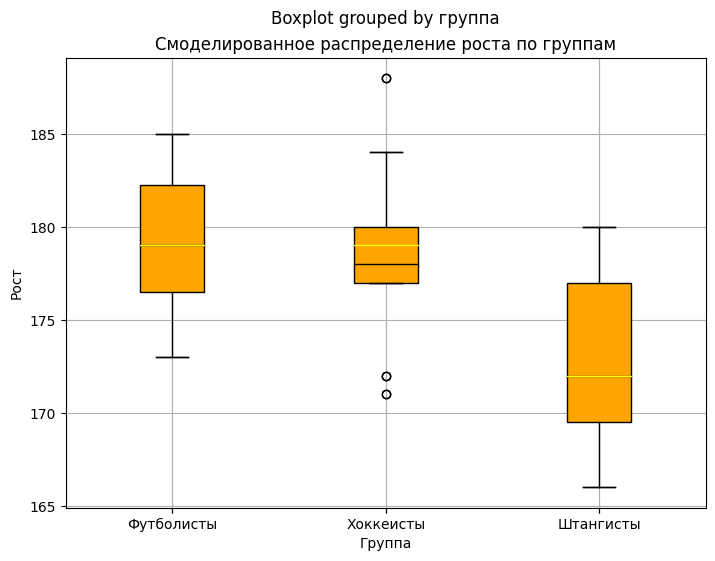

In [121]:
boxplot_new = df_model.boxplot('рост', by='группа', figsize=(8, 6), patch_artist = True)
sns.set_palette(['orange', 'yellow'])
plt.boxplot([ftbl_heights, hck_heights, pwr_heights], labels = ['Футболисты', 'Хоккеисты', 'Штангисты'], patch_artist = True)
plt.title("Смоделированное распределение роста по группам")
plt.xlabel("Группа")
plt.ylabel("Рост")
plt.grid(True)
plt.show();